In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Dataset load

In [2]:
with open('sub1-train/Signal_Train.pkl', 'rb') as f:
    signal_train = pickle.load(f)
signal_train = np.array(signal_train)
signal_train.shape

(2400, 5000, 12)

In [3]:
len(signal_train[0][1])

12

In [4]:
with open('sub1-train/Target_Train.pkl', 'rb') as f:
    target_train = pickle.load(f)
target_train = np.array(target_train)
target_train.shape

(2400, 1)

In [5]:
target_train[:10]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# Draw plot

In [6]:
def plot_signals(data):
    num_signals = data.shape[1]
    fig, axes = plt.subplots(num_signals, 1, figsize=(12, 24), sharex=True)
    
    for i in range(num_signals):
        axes[i].plot(data[:, i])
        axes[i].set_title(f'Signal {i+1}')
        axes[i].set_ylabel('Amplitude')
    
    axes[-1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

## Normal signal visualization (idx=0)

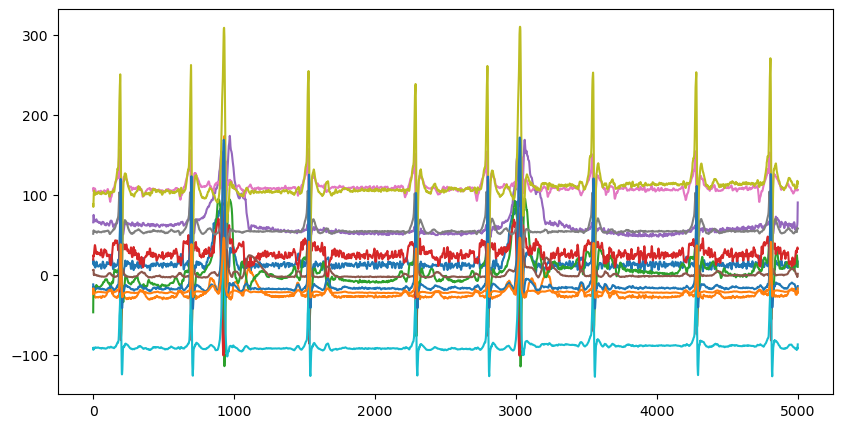

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(signal_train[0])
plt.show()

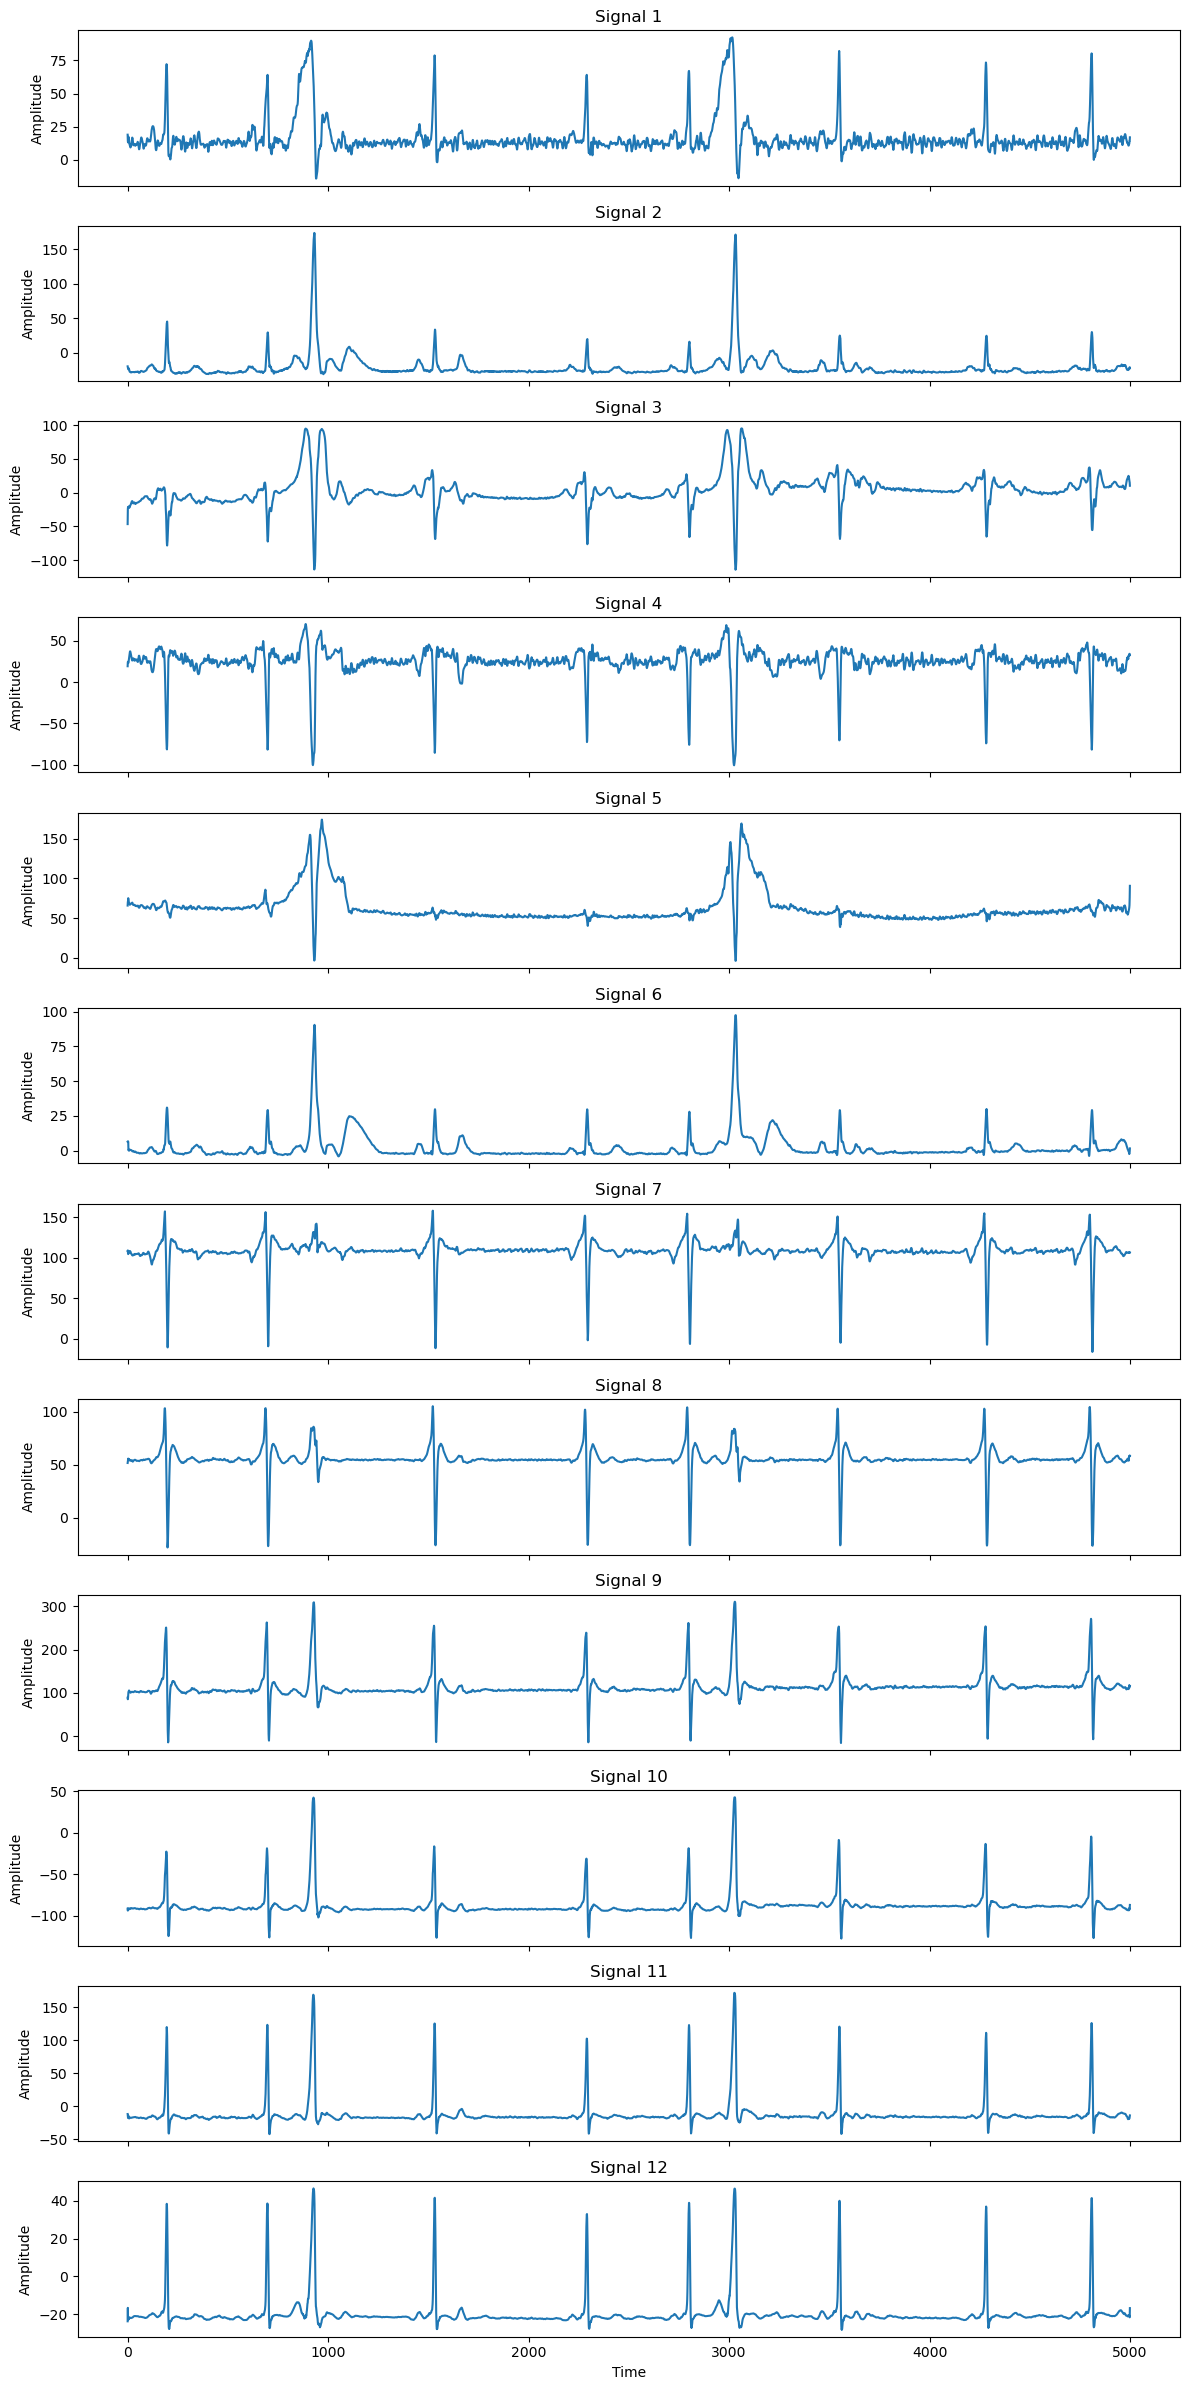

In [8]:
plot_signals(signal_train[0])

## Abnormal signal visualization (idx=2)

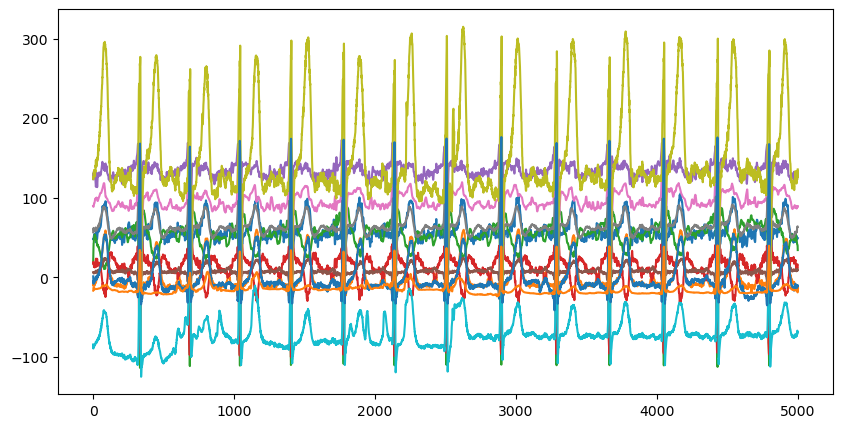

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(signal_train[2])
plt.show()

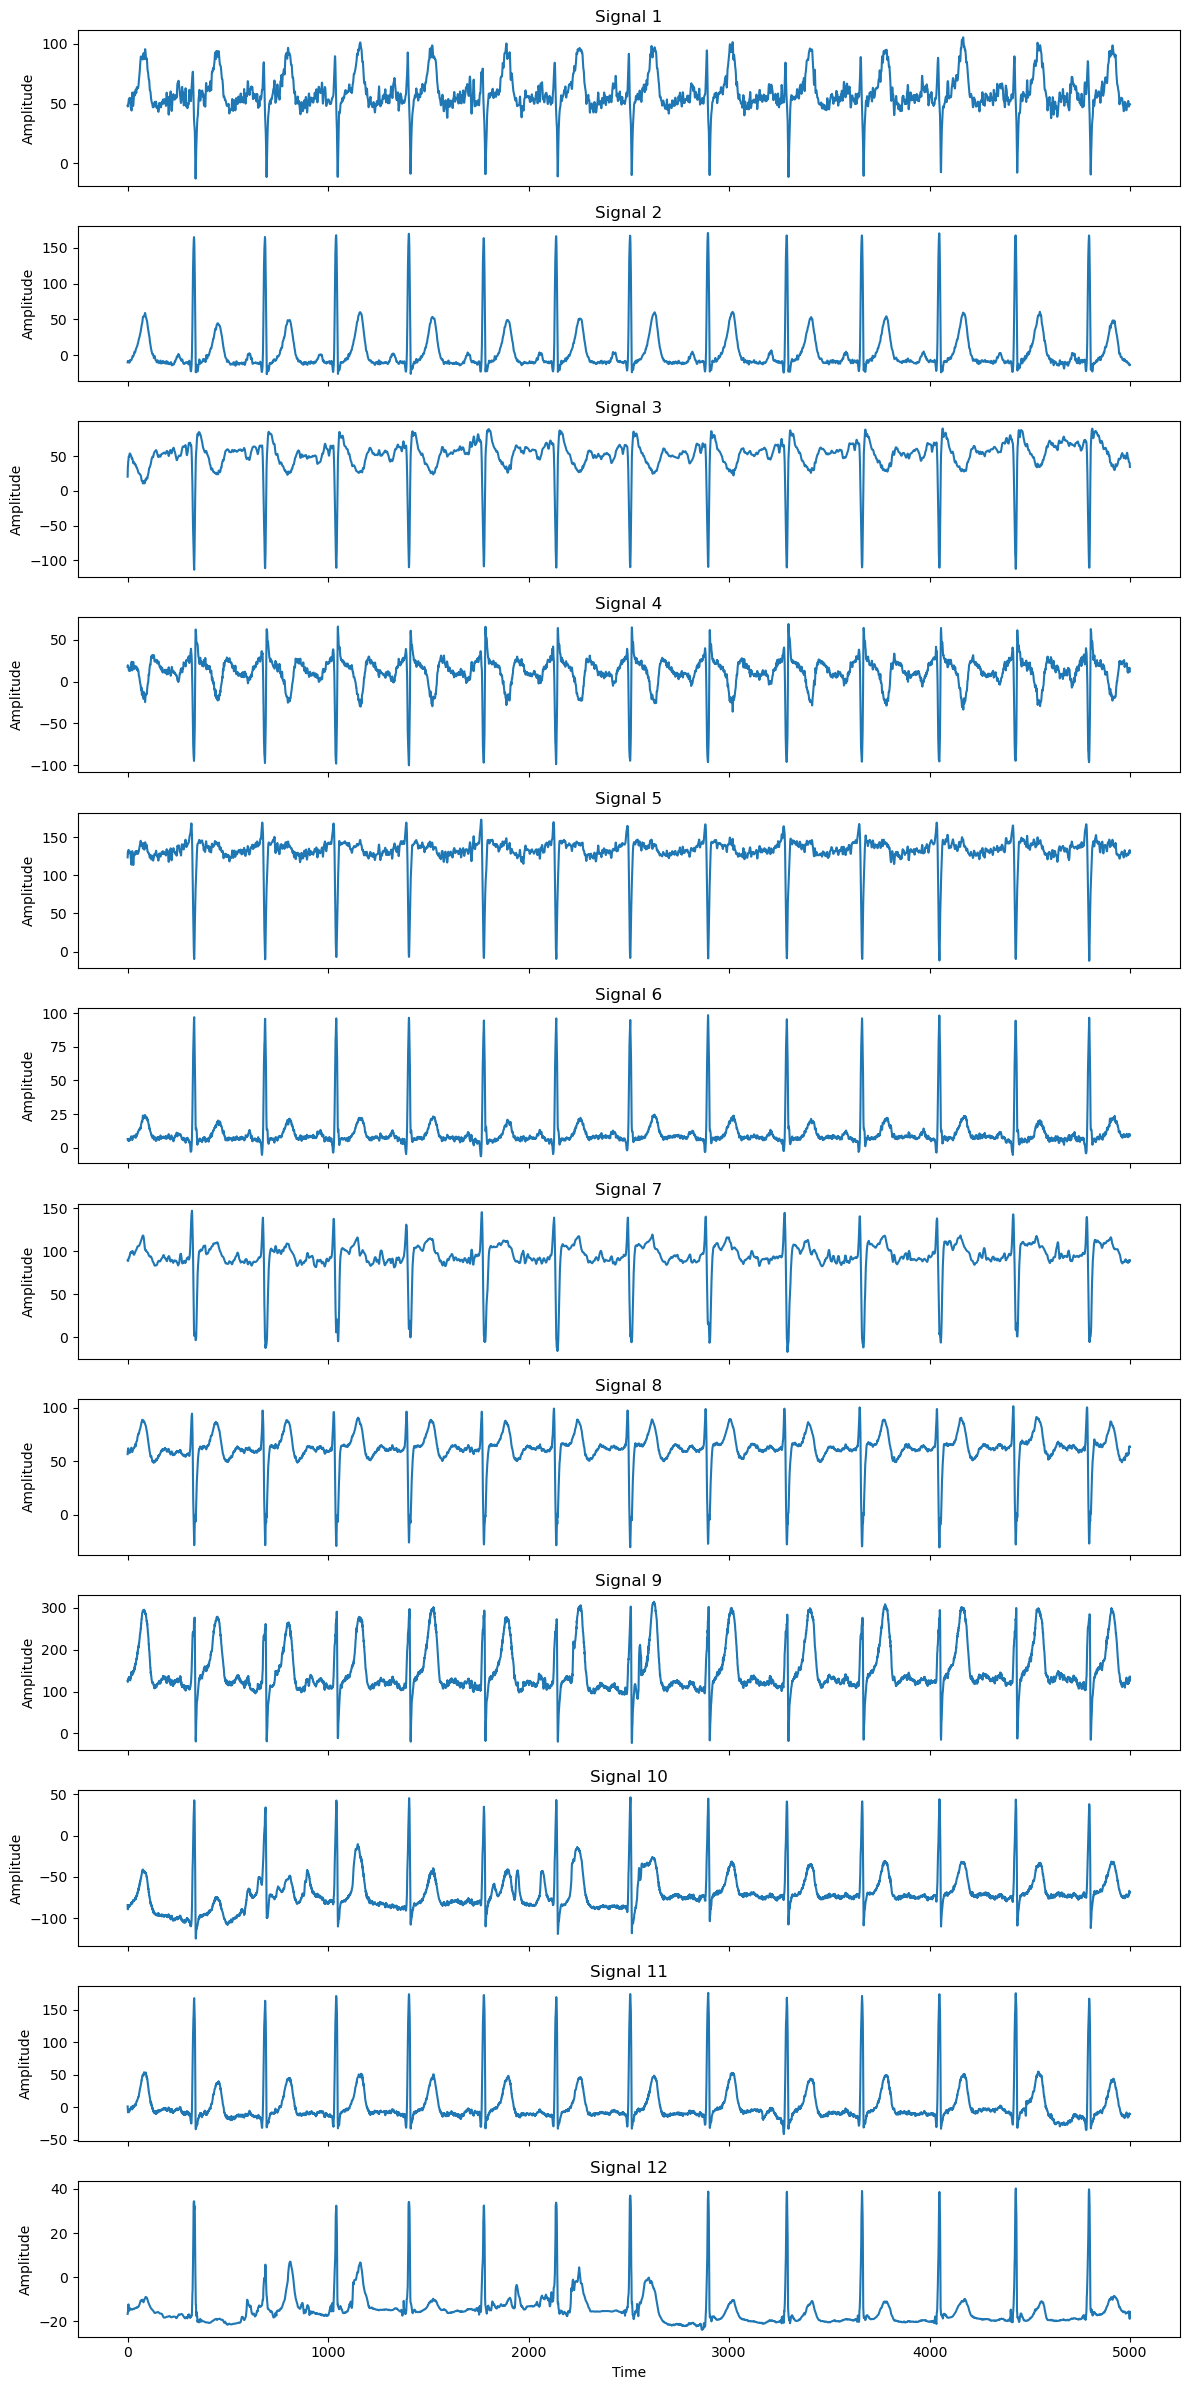

In [10]:
plot_signals(signal_train[2])

# Signal normalize

In [11]:
def sig_norm(data):
    return (data - np.mean(data)) / np.std(data)

In [12]:
def all_sig_norm(signal, idx):
	norm_signal = []
	for s in range(len(signal[idx][0])):
		signal[idx, :, s] = sig_norm(signal[idx, :, s])
		norm_signal.append(sig_norm(signal[idx, :, s]))

	norm_signal = np.array(norm_signal)
	return norm_signal.T

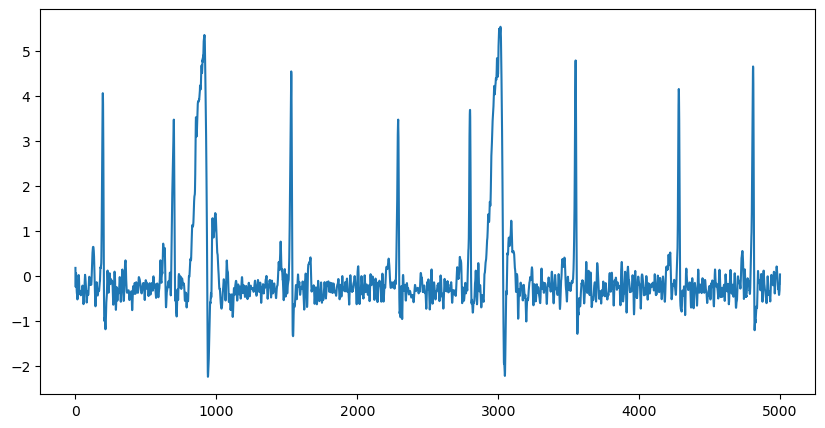

In [13]:
signal_mean = np.mean(signal_train[0, :, 0])
signal_std = np.std(signal_train[0, :, 0])
signal_mean, signal_std
norm_signal = sig_norm(signal_train[0, :, 0])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(norm_signal)
plt.show()

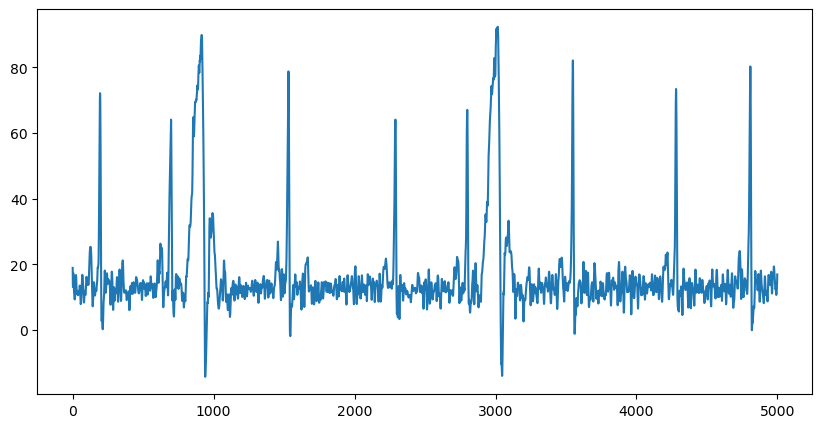

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(signal_train[0, :, 0])
plt.show()

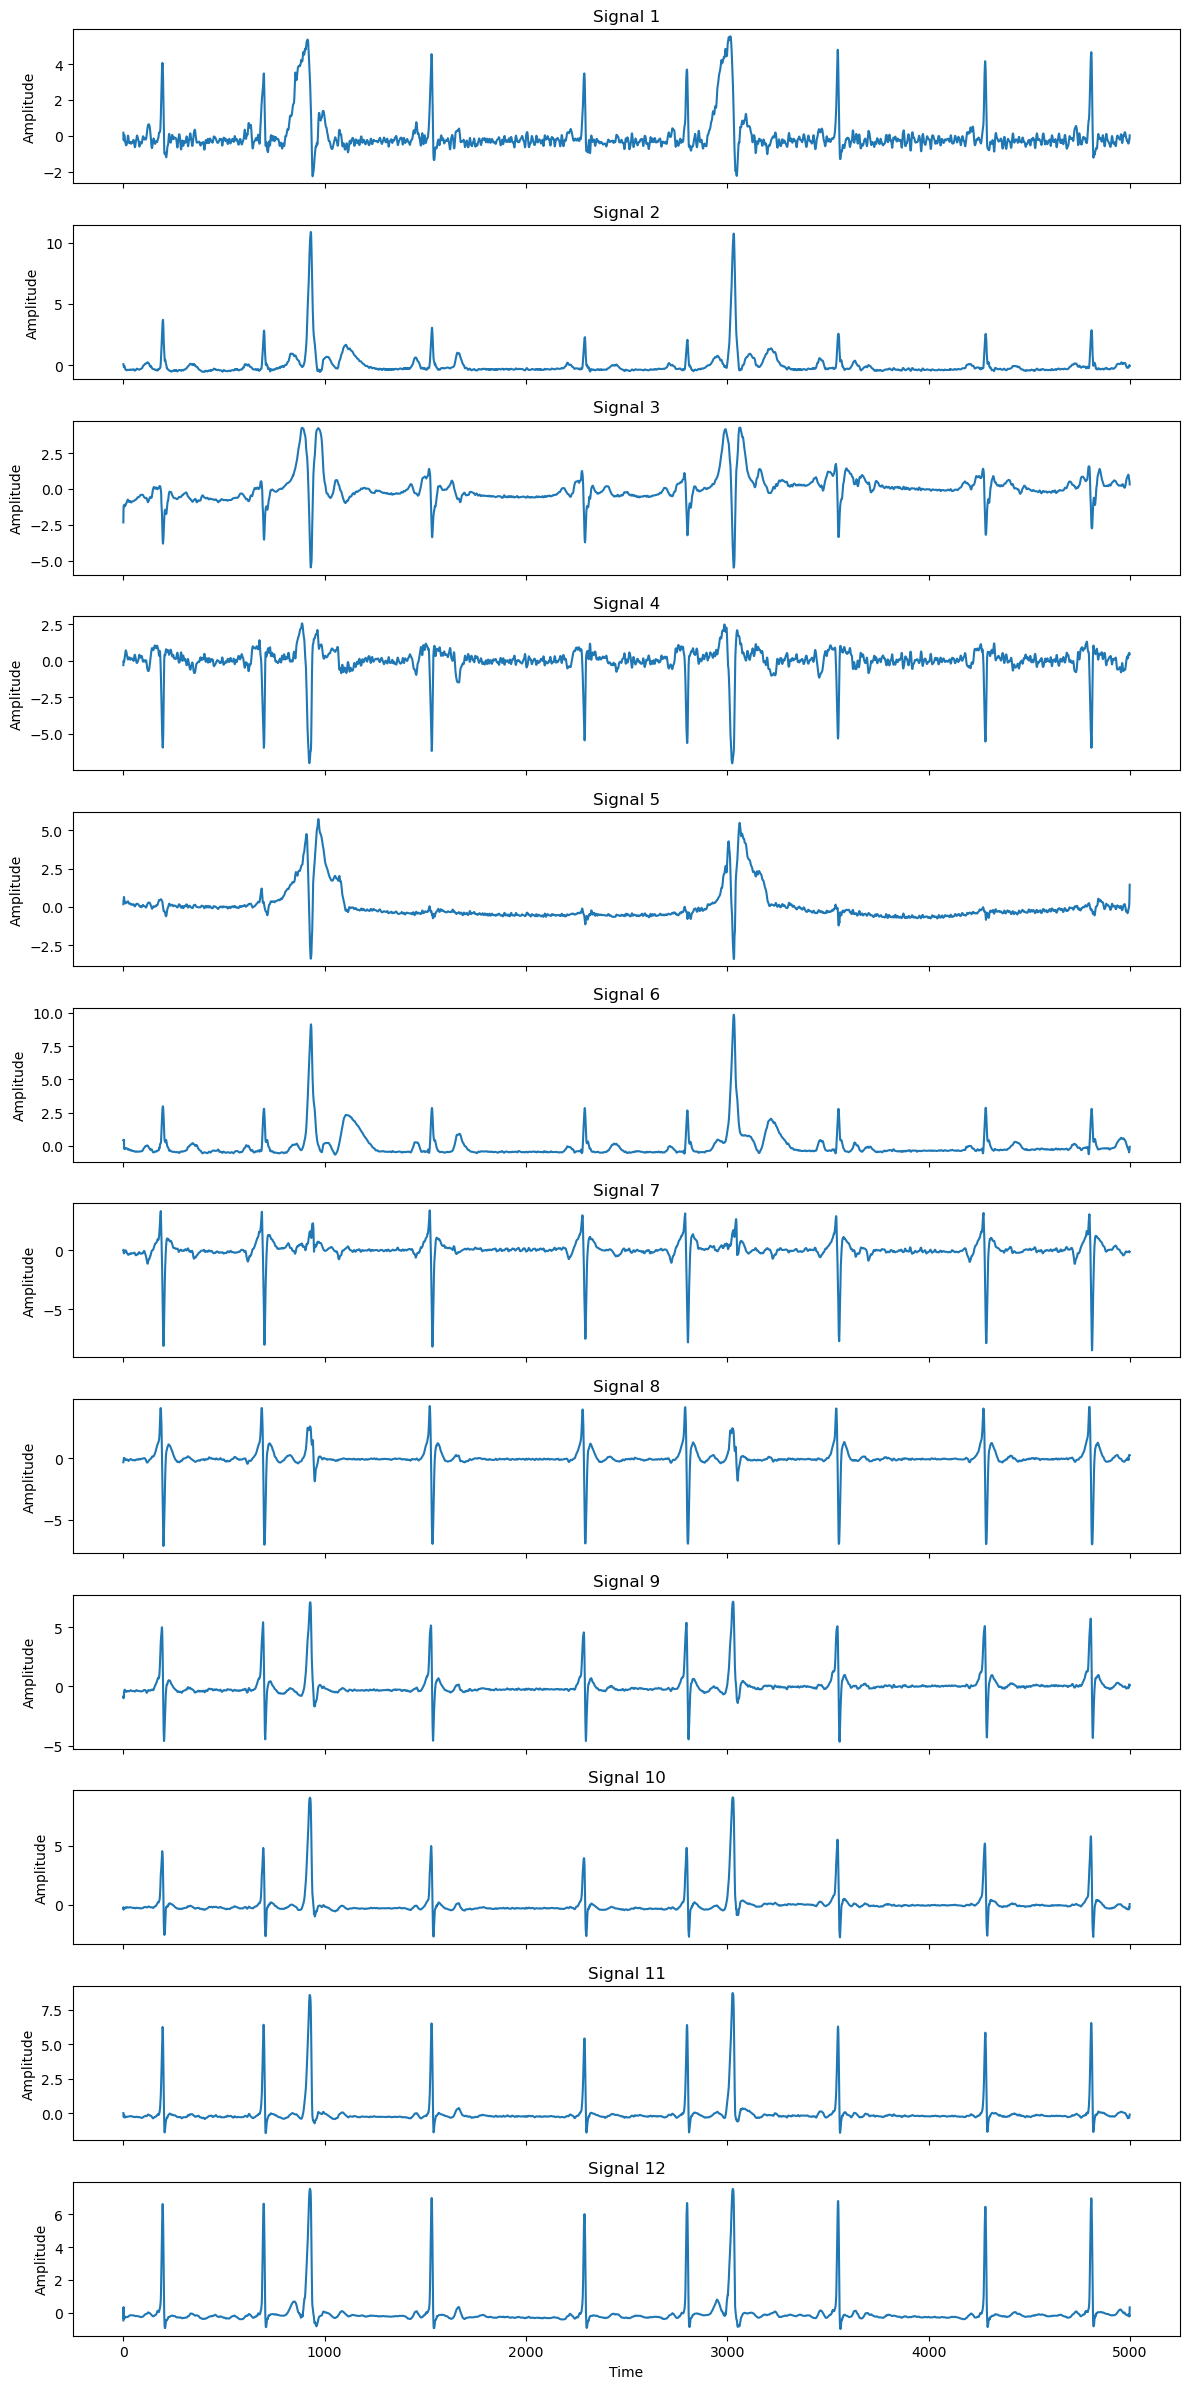

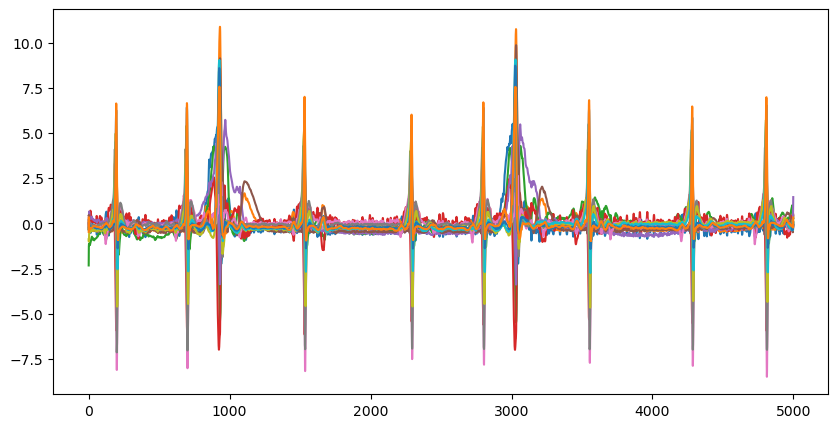

In [15]:
norm_signal_0 = all_sig_norm(signal_train, 0)

plot_signals(norm_signal_0)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(norm_signal_0)
plt.show()


## Normalize with Transfrom

In [16]:
norm_signal_0.T.shape

(12, 5000)

In [17]:
flat_sig = norm_signal_0.T.reshape(-1)
flat_sig.shape

(60000,)

In [18]:
norm_signal_0[:,0].shape

(5000,)

In [19]:
norm_signal_0[:,0][:10]

array([ 0.17536433, -0.17719746, -0.2494721 , -0.18867174,  0.06065109,
        0.01484179, -0.0099784 , -0.14477018, -0.24966973, -0.3310137 ],
      dtype=float32)

In [20]:
flat_sig[:10]

array([ 0.17536433, -0.17719746, -0.2494721 , -0.18867174,  0.06065109,
        0.01484179, -0.0099784 , -0.14477018, -0.24966973, -0.3310137 ],
      dtype=float32)

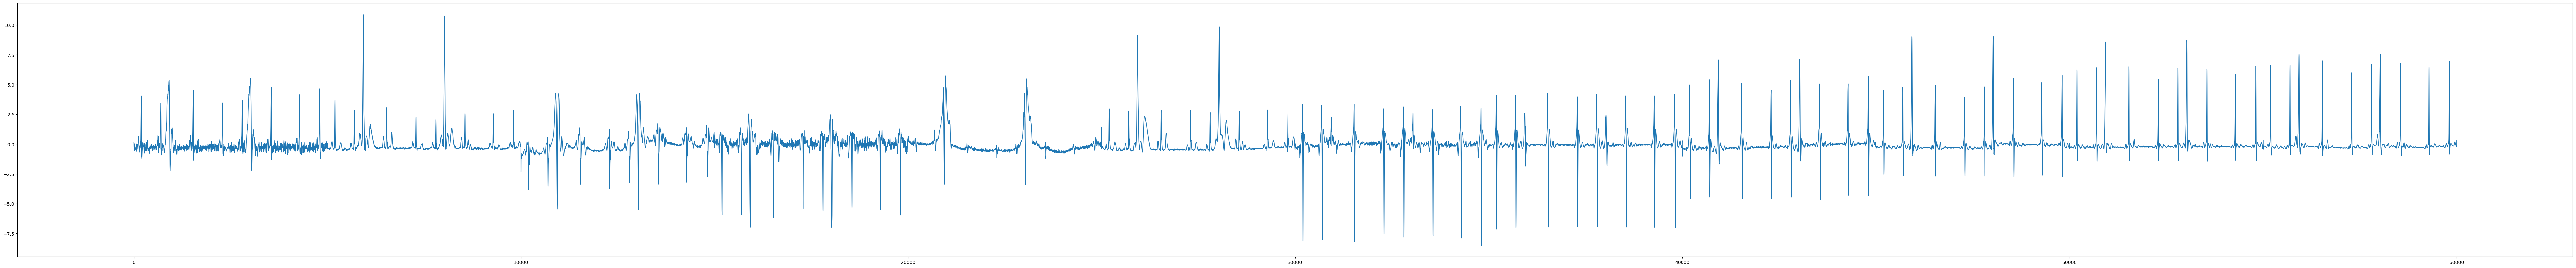

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(100, 10), dpi=100)
ax.plot(flat_sig)
plt.show()

# Data split

Find normal signal

In [22]:
normal_signal_list = np.where(target_train == 0)
len(normal_signal_list[0]), normal_signal_list[0]

(1799, array([   0,    1,    4, ..., 2397, 2398, 2399], dtype=int64))

Find abnormal signal

In [23]:
abnormal_signal_list = np.where(target_train == 1)
len(abnormal_signal_list[0]), abnormal_signal_list[0]

(601,
 array([   2,    3,   22,   23,   24,   26,   28,   37,   39,   40,   46,
          59,   62,   68,   76,   83,   86,   87,   88,   95,   97,  103,
         107,  114,  124,  125,  127,  128,  130,  132,  136,  146,  147,
         152,  154,  155,  157,  159,  162,  164,  173,  180,  182,  187,
         196,  198,  199,  209,  219,  223,  226,  227,  231,  232,  233,
         236,  241,  248,  257,  259,  264,  279,  282,  286,  290,  293,
         297,  300,  302,  304,  306,  312,  325,  331,  332,  333,  336,
         338,  340,  341,  356,  359,  365,  384,  388,  396,  399,  400,
         413,  417,  420,  427,  428,  429,  430,  433,  438,  447,  449,
         450,  452,  463,  464,  467,  468,  486,  487,  488,  494,  497,
         498,  499,  502,  504,  507,  509,  512,  514,  515,  518,  524,
         526,  530,  533,  542,  546,  547,  554,  561,  563,  564,  571,
         577,  579,  580,  591,  593,  596,  599,  600,  602,  606,  607,
         608,  610,  613,  619, 

In [24]:
len(normal_signal_list[0]) + len(abnormal_signal_list[0])

2400

In [25]:
shuffle_ab_sig = abnormal_signal_list[0]
shuffle_no_sig = normal_signal_list[0]

In [26]:
random.shuffle(shuffle_ab_sig)
random.shuffle(shuffle_no_sig)
len(shuffle_ab_sig), len(shuffle_no_sig), shuffle_ab_sig[:10], shuffle_no_sig[:10]

(601,
 1799,
 array([2164, 1189,  716,  922, 1120, 1788, 1634, 1407, 1813, 1237],
       dtype=int64),
 array([2001,   17, 1951, 2273,  324, 1828,  882,  177, 2310, 1549],
       dtype=int64))

# 데이터 시각화 및 분석 결과

- 정상 signal과 비정상 signal을 시각화 한 결과, Artifact로 보이는 부분은 12채널에 모두 있어 보이지 않음 (idx 2의 10번 12번 signal 참고, 대회 설명 참고)
-> 따라서 12 채널의 신호 중에 Artifact가 하나라도 있으면 비정상 신호로 간주해야 함

## Method
1. 모델 학습 방법: 12채널의 신호를 각각 normalize 해준다음에 1차원으로 쫙펴서 모델에 학습
	- (5000, 12) -> (60000,)
	- input: 60000 length의 1차원 signal (12채널을 핀)
	- target: 0,1 (binary)
2. 데이터 분할 방법: Target_train.pkl에서 0과 1의 idx를 찾아서 8:2로 split 할때 비율 맞춰서 나누기
	- np.where로 0, 1 찾기
	- 정상 signal과 비정상 signal idx list를 shuffle로 섞은다음 8:2로 나누기

## Discussion
1. signal normalize 할 때, 채널별로 하는게 맞는지? 12채널의 평균, 표준편차 구해서 normalize 해주는게 맞는지?
2. 12채널 신호를 1차원으로 reshape 한다음에 학습하는 방법이 효율적일지?
